# Implementing a Kaggle Workflow

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#file loading
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

In [4]:
#preview
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [6]:
# creating a new function to apply all those functions

def applyall(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    cols =  ["Age_categories", "Fare_categories","Title", "Cabin_type", "Sex"]
    for col in cols:
        df = create_dummies(df, col)

    return df

In [7]:
#applying all those to the train and holdout df
train = applyall(train)
holdout = applyall(holdout)

In [8]:
#ensuring data has been preprocessed 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_categories',
       'Fare_categories', 'Title', 'Cabin_type', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_type_A',
       'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
       'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown',
       'Sex_female', 'Sex_male'],
      dtype='object')

# Exploring SibSp and Parch

In [9]:
cols = ["SibSp", "Parch", "Survived"]
train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
SibSp       891 non-null int64
Parch       891 non-null int64
Survived    891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB


In [10]:
train[cols].describe()

,SibSp,Parch,Survived
count,891.000000,891.000000,891.000000
mean,0.523008,0.381594,0.383838
std,1.102743,0.806057,0.486592
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,8.000000,6.000000,1.000000


In [11]:
#create df called explore to explore these variables
explore = train[cols].copy()

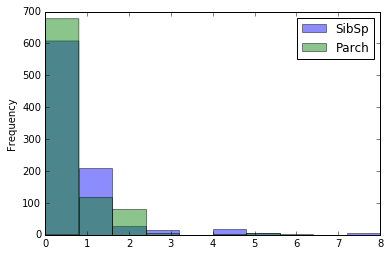

In [12]:
explore.drop("Survived", axis =1).plot.hist(alpha = 0.45)
plt.show()

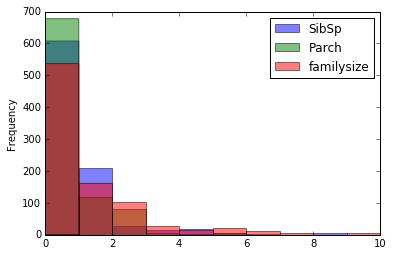

In [13]:
# create new column called "Family Size" sum of these two
explore["familysize"] = explore[["SibSp", "Parch"]].sum(axis = 1)
explore.drop("Survived", axis =1).plot.hist(alpha = 0.5)
plt.show()

# Survival Rate of SibSp, Parch, & familysize

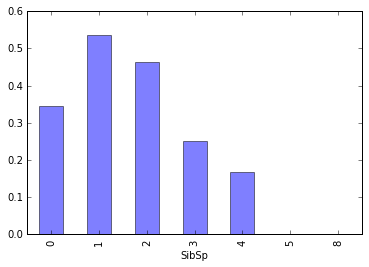

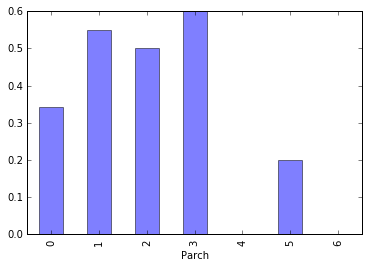

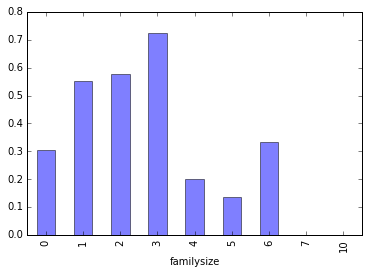

In [14]:
for col in explore.drop("Survived", axis =1):
    pd.pivot_table(explore, index = col, values = "Survived").plot.bar(alpha = 0.5)
    plt.show()

* The SibSp column shows the number of siblings and/or spouses each passenger had on board, while the Parch columns shows the number of parents or children each passenger had onboard. Neither column has any missing values.
* The distribution of values in both columns is skewed right, with the majority of values being zero.
* You can sum these two columns to explore the total number of family members each passenger had onboard. The shape of the distribution of values in this case is similar, however there are less values at zero, and the quantity tapers off less rapidly as the values increase.
* Looking at the survival rates of the the combined family members, you can see that few of the over 500 passengers with no family members survived, while greater numbers of passengers with family members survived.
* Only **30%** of passengers without family members survived, might be worth binning a feature based on this

# Feature Engineering
* add a new column "isalone", boolean column of whether passenger was alone, based on family size

In [37]:
def isalone (a):
    a["familysize"] = a["SibSp"] + a["Parch"]
    a["isalone"] = 0
    a.loc[(a["familysize"] == 0), "isalone"] = 1
    a = a.drop("familysize", axis=1)
    return a

In [38]:
train = isalone(train)
holdout = isalone(holdout)

# Feature Selection
* choose the best features out of the following:
* perform the RandomForestClassifer and select features using Recursive Feature Elimination (RFECV)

In [53]:
pd.DataFrame({"Features": train.columns.tolist()[4:45]})

,Features
0,Sex
1,Age
2,SibSp
3,Parch
4,Ticket
5,Fare
6,Embarked
7,Age_categories
8,Fare_categories
9,Title


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import numpy as np
def select_features(df):
    #remove columns which are non numeric and also has null values
    df = df.select_dtypes([np.number]).dropna(axis = 1)
    all_X = df.drop(["PassengerId", "Survived"], axis = 1)
    all_y = df["Survived"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf, cv =10)
    selector.fit(all_X, all_y)
    
    #this would have returned an index
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n" + "-"*12 + "\n{}".format(best_columns))
    
    return best_columns

cols = select_features(train)

Best Columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


# Model Selection and Hyperparameter Tuning

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df, features):
    
    all_X = df[features]
    all_y = df["Survived"]
    
    #create a list of dics which contains models and hyperparameters
    models = [
        
        {
            "name": "Logistic Regression",
            "estimator": LogisticRegression(),
            "hyperparameters":
            {
             "solver": ["newton-cg", "lbfgs", "liblinear"]   
            }
            
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }   
        
    ]
    
    for model in models:
        print(model["name"])
        print("-"*len(model["name"]))
        
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        
        print("Best Paramerters:\n" + "{}".format(model["best_params"]))
        print("Best Score:\n" + "{}".format(model["best_score"]))
        print("Best Model:\n" + "{}\n".format(model["best_model"]))
        
        
    return models

In [76]:
result = select_model(train, cols)

Logistic Regression
-------------------
Best Paramerters:
{'solver': 'liblinear'}
Best Score:
0.8204264870931538
Best Model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

KNeighborsClassifier
--------------------
Best Paramerters:
{'p': 1, 'weights': 'uniform', 'algorithm': 'brute', 'n_neighbors': 5}
Best Score:
0.7755331088664422
Best Model:
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

RandomForestClassifier
----------------------
Best Paramerters:
{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 4, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:
0.8294051627384961
Best Model:
RandomForestClassifier(bootstra

* clear winner here is **RandomForestClassifier** with the following parameters:
            RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [83]:
def submit_file (model, cols, filename = "submissions.csv"):
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids, "Survived": predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index = False)
    return submission

In [84]:
best_rf_model = result[2]["best_model"]

In [85]:
check = submit_file(best_rf_model, cols)

In [86]:
check

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
